In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [76]:
μ = 5
σ_f, σ_g = 1,3
f = norm(μ,σ_f)
g = norm(μ,σ_g)

In [92]:
N = 40
x_f = f.rvs(N)
x_g = f.rvs(N)

In [107]:
m = 100
μ_grid = np.linspace(μ-7,μ+7,m)
dx = μ_grid[1]-μ_grid[0]
logl_grid_f = np.empty((m,N))
logl_grid_g = np.empty((m,N))
for i in range(N):
    logl_grid_f[:,i] = np.log(norm(loc=μ_grid,scale=σ_f).pdf(x_f[i]))
    logl_grid_g[:,i] = np.log(norm(loc=μ_grid,scale=σ_g).pdf(x_g[i]))

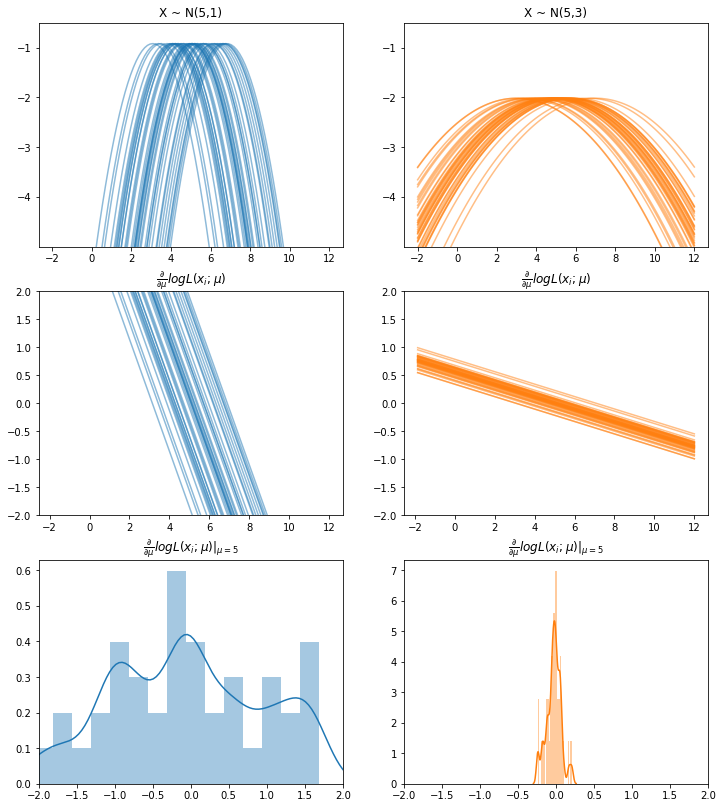

In [130]:
fig, axes = plt.subplots(3,2,figsize=(12,14))
axes = axes.flatten()
axes[0].title.set_text(f'X ~ N(5,{σ_f})')
axes[1].title.set_text(f'X ~ N(5,{σ_g})')
for ax in axes[:2]:
    ax.set_ylim(-5,-.5)
    ax.set_yticks([-1,-2,-3,-4])
    
for ax in axes[2:4]:
    ax.set_ylim(-2,2)
    ax.title.set_text(r'$\frac{\partial}{\partial \mu}logL(x_i;\mu)$')
for ax in axes[4:]:
    ax.set_xlim(-2,2)
    ax.title.set_text(r'$\frac{\partial}{\partial \mu}logL(x_i;\mu)|_{\mu=5}$')
hist_f = []
hist_g = []
for i in range(N):
    axes[0].plot(μ_grid,logl_grid_f[:,i],c='tab:blue',alpha=.5)
    axes[1].plot(μ_grid,logl_grid_g[:,i],c='tab:orange',alpha=.5)
    axes[2].plot(μ_grid[1:],np.diff(logl_grid_f[:,i])/dx,c='tab:blue',alpha=.5)
    axes[3].plot(μ_grid[1:],np.diff(logl_grid_g[:,i])/dx,c='tab:orange',alpha=.5)
    
    hist_f.append(derivative(logl_grid_f,50))
    hist_g.append(derivative(logl_grid_g,50))
    

sns.distplot(hist_f,ax=axes[4])
sns.distplot(hist_g,ax=axes[5],color='tab:orange')
fig.savefig('fisher_info.pdf')

for en gitt observasjon har jeg tilsynelatende konstant andrederivert.. vet ikke hvorfor. Prøver å finne forventingsverdi?